In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

cancer = load_breast_cancer()
print(cancer.DESCR)


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

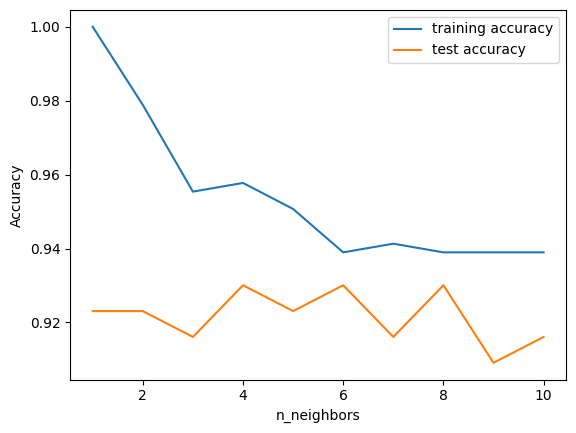

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=46
)
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()


In [45]:
# prompt: generate confusion matrix when n_neighbors is 6

from sklearn.metrics import confusion_matrix
# Build the model with n_neighbors=6
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
# Make predictions on the test set
y_pred = knn.predict(X_test)
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: KNN where k = 6")
cm


Confusion Matrix: KNN where k = 6


array([[46,  7],
       [ 3, 87]])

In [46]:

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))


Accuracy on training set: 0.986
Accuracy on test set: 0.951


In [47]:
# prompt: generate confusion matrix on tree

# Make predictions on the test set for the decision tree
y_pred_tree = tree.predict(X_test)
# Generate the confusion matrix for the decision tree
cm_tree = confusion_matrix(y_test, y_pred_tree)
print("Confusion Matrix for Decision Tree:")
cm_tree


Confusion Matrix for Decision Tree:


array([[48,  5],
       [ 2, 88]])

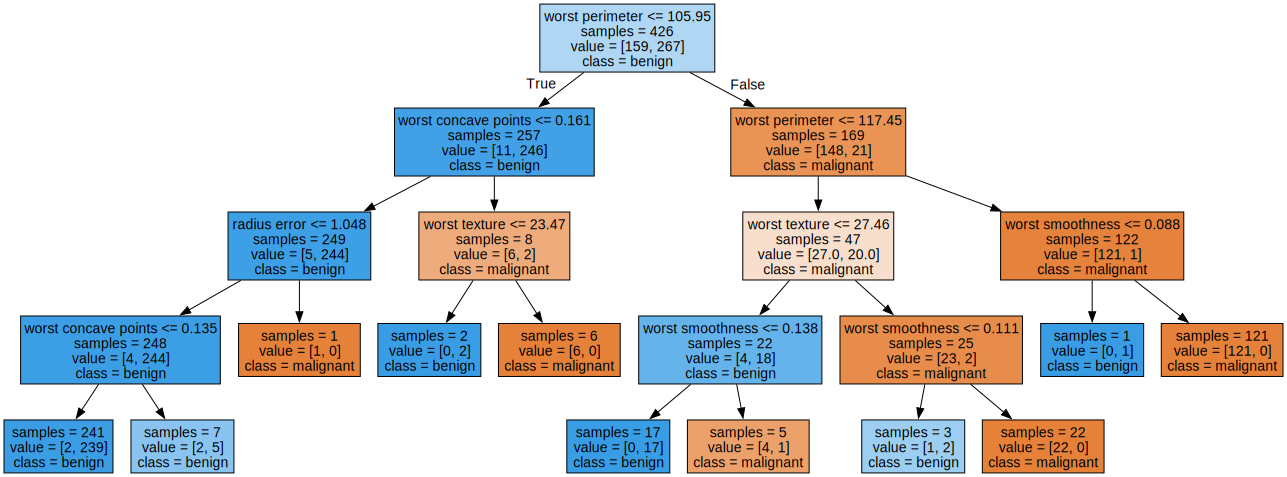

In [48]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))


In [49]:
# prompt: generate confusion matrix of gbrt
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
gbrt = GradientBoostingClassifier()

# Train the model on the training dataset
gbrt.fit(X_train, y_train)

# Make predictions on the test set using the trained GBTR model
y_pred_gbrt = gbrt.predict(X_test)
# Generate the confusion matrix for the GBTR model
cm_gbrt = confusion_matrix(y_test, y_pred_gbrt)
print("Confusion Matrix for Gradient Boosted Regression Trees:")
cm_gbrt


Confusion Matrix for Gradient Boosted Regression Trees:


array([[48,  5],
       [ 3, 87]])

Random Forest Classifier Performance:
Accuracy: 0.965
Precision: 0.957
Recall: 0.989
F1 Score: 0.973

Confusion Matrix - Random Forest:
[[49  4]
 [ 1 89]]


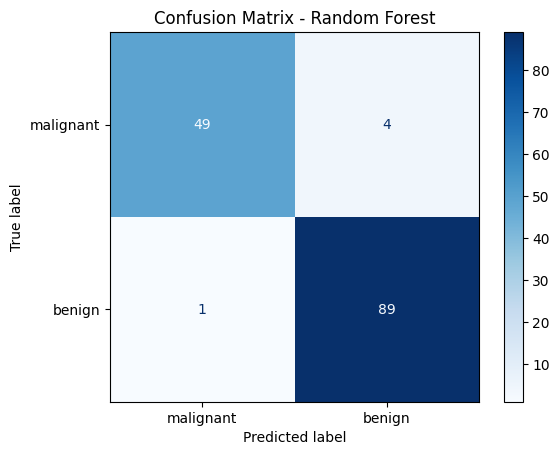

In [50]:
# -------------------------------------------------------------------------
# Random Forest Classifier
# -------------------------------------------------------------------------

# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Load the breast cancer dataset
cancer = load_breast_cancer()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=46
)

# Initialize and train the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=None)
rf_clf.fit(X_train, y_train)

# Make predictions on the test set using Random Forest
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Print evaluation metrics for Random Forest
print("Random Forest Classifier Performance:")
print(f"Accuracy: {accuracy_rf:.3f}")
print(f"Precision: {precision_rf:.3f}")
print(f"Recall: {recall_rf:.3f}")
print(f"F1 Score: {f1_rf:.3f}")



# Generate and display the confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix - Random Forest:")
print(cm_rf)
ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=cancer.target_names).plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()





Gradient Boosting Classifier Performance:
Accuracy: 0.965
Precision: 0.947
Recall: 1.000
F1 Score: 0.973

Classification Report - Gradient Boosting:
              precision    recall  f1-score   support

   malignant       1.00      0.91      0.95        53
      benign       0.95      1.00      0.97        90

    accuracy                           0.97       143
   macro avg       0.97      0.95      0.96       143
weighted avg       0.97      0.97      0.96       143


Confusion Matrix - Gradient Boosting:
[[48  5]
 [ 0 90]]


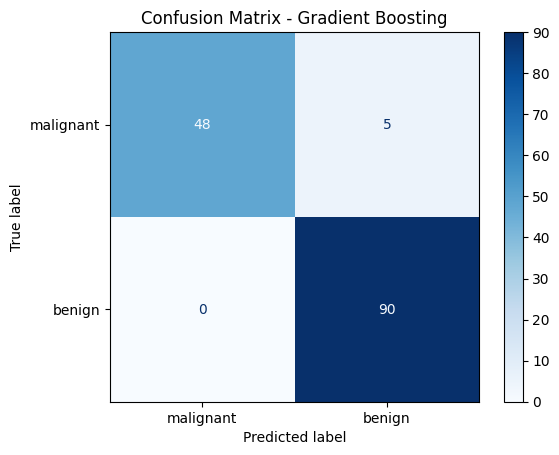

In [51]:
# -------------------------------------------------------------------------
# Gradient Boosting Classifier
# -------------------------------------------------------------------------

# Initialize and train the Gradient Boosting Classifier
gbrt_clf = GradientBoostingClassifier(random_state=42, max_depth=1, n_estimators=100, learning_rate=0.1)
gbrt_clf.fit(X_train, y_train)

# Make predictions on the test set using Gradient Boosting
y_pred_gbrt = gbrt_clf.predict(X_test)

# Evaluate the Gradient Boosting model
accuracy_gbrt = accuracy_score(y_test, y_pred_gbrt)
precision_gbrt = precision_score(y_test, y_pred_gbrt)
recall_gbrt = recall_score(y_test, y_pred_gbrt)
f1_gbrt = f1_score(y_test, y_pred_gbrt)

# Print evaluation metrics for Gradient Boosting
print("\nGradient Boosting Classifier Performance:")
print(f"Accuracy: {accuracy_gbrt:.3f}")
print(f"Precision: {precision_gbrt:.3f}")
print(f"Recall: {recall_gbrt:.3f}")
print(f"F1 Score: {f1_gbrt:.3f}")

# Print the classification report for Gradient Boosting
print("\nClassification Report - Gradient Boosting:")
print(classification_report(y_test, y_pred_gbrt, target_names=cancer.target_names))

# Generate and display the confusion matrix for Gradient Boosting
cm_gbrt = confusion_matrix(y_test, y_pred_gbrt)
print("\nConfusion Matrix - Gradient Boosting:")
print(cm_gbrt)
ConfusionMatrixDisplay(confusion_matrix=cm_gbrt, display_labels=cancer.target_names).plot(cmap="Blues")
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()

Logistic Regression Performance:
Accuracy: 0.937
Precision: 0.945
Recall: 0.956
F1 Score: 0.950

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

   malignant       0.92      0.91      0.91        53
      benign       0.95      0.96      0.95        90

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143


Confusion Matrix - Logistic Regression:
[[48  5]
 [ 4 86]]


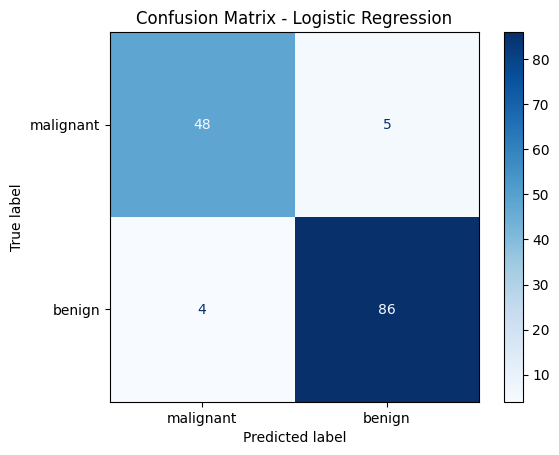

In [52]:
# -------------------------------------------------------------------------
# Logistic Regression
# -------------------------------------------------------------------------


# Import required libraries
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the breast cancer dataset
cancer = load_breast_cancer()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=46
)

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=10000)
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)

# Print evaluation metrics for Logistic Regression
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_log_reg:.3f}")
print(f"Precision: {precision_log_reg:.3f}")
print(f"Recall: {recall_log_reg:.3f}")
print(f"F1 Score: {f1_log_reg:.3f}")

# Print the classification report for Logistic Regression
print("\nClassification Report - Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg, target_names=cancer.target_names))

# Generate and display the confusion matrix for Logistic Regression
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print("\nConfusion Matrix - Logistic Regression:")
print(cm_log_reg)

ConfusionMatrixDisplay(confusion_matrix=cm_log_reg, display_labels=cancer.target_names).plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()



# Performance Comparison Table

| **Metric**          | **Logistic Regression** | **Random Forest**    | **Gradient Boosting**  | **Best Model (Recommendation)** |
|----------------------|-------------------------|-----------------------|-------------------------|----------------------------------|
| **Accuracy**         | 93.7%                  | **96.5%**            | **96.5%**              | Random Forest or Gradient Boosting |
| **Precision (Malignant)** | 92%                   | 98%                  | **100%**               | Gradient Boosting               |
| **Precision (Benign)**    | 95%                   | **96%**              | 95%                   | Random Forest                   |
| **Recall (Malignant)**    | 91%                   | **92%**              | 91%                   | Random Forest                   |
| **Recall (Benign)**       | 96%                   | 99%                  | **100%**               | Gradient Boosting               |
| **F1-Score (Malignant)**  | 91%                   | **95%**              | 95%                   | Random Forest or Gradient Boosting |
| **F1-Score (Benign)**     | 95%                   | 97%                  | **97%**                | Random Forest or Gradient Boosting |



---

## Key Observations for Recommendations:

1. **If avoiding false positives is critical** (e.g., benign cases being incorrectly classified as malignant):(choose higher precision (begnin) )
   - **Gradient Boosting** is the best choice as it has **no false positives**.

2. **If avoiding false negatives is critical** (e.g., malignant cases being missed):(Choose higher recall (malignant))
   - **Random Forest** is the best choice as it has the **lowest false negatives**.

3. **For a simple, interpretable baseline**:
   - **Logistic Regression** is preferred due to its simplicity, though it slightly underperforms compared to ensemble methods.